**ABOUT DATASET:**

---
THIS KAGGLE DATASET HAS AROUND 5000 MOVIE REVIEWS

DATASET HAS 2 COLUMNS: 

1.   SENTIMENT(POSITIVE/NEGATIVE)
2.   REVIEW(MOVIE REVIEWS)








### READING DATASET

In [ ]:
import pandas as pd
import numpy as np
import nltk
df=pd.read_csv('Moview_Reviews.csv')
df.rename(columns={'review' :'text'},inplace=True)
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.describe()

,text,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


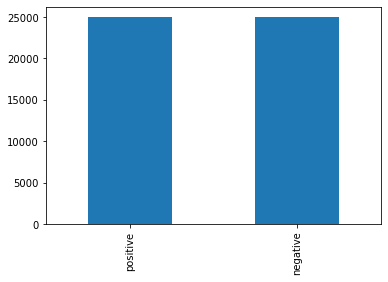

In [ ]:
import seaborn as sns
y = df['sentiment']
y.value_counts().plot(kind ="bar")

In [ ]:
# this bar plot shows that our data is balanced

### REMOVING PUNCTUATIONS

In [ ]:
punctuations=['!', '@' , '#' , ',' , '&', '.' , '(' , ')' , '[' , ']' , '"' , ':' ,"'" , '?' ,'/','*','Ã','©']
punctuations += '�' 
def remove_punct(doc):  
    for p in punctuations:
      if p in doc:
        doc = doc.replace(p,"")
    # print(doc)
    return doc



In [ ]:
df['text'] = df['text'].apply(remove_punct)
df.head(2)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production <br ><br >The fi...,positive


### REMOVING STOPWORDS AND HTML AND TAGS(I.E. @)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))

def remove_stopwords(doc):
  # split each sentence into words and convert them into lower case and put in a words_filtered list
    words_filtered = [word.lower() for word in doc.split()]

    words_cleaned=[]
    for word in words_filtered:
      if 'http' not in word  and not word.startswith('@')and not word.startswith('<')and not word.startswith('>') and not word.startswith('#')  :
           words_cleaned.append(word)
    
    # join the words back to a sentenced(stopwords removed) and return i
    doc_without_stopwords = ' '.join([word for word in words_cleaned if not word in stopwords_set])
    
    return doc_without_stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kritsid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# apply stopwords function to text column
df['text'] = df['text'].apply(remove_stopwords)
df.head(2)

,text,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive


### TOKENIZATION(splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms.)

In [ ]:
# nltk.download('punkt')
# tokenize
from nltk.tokenize import word_tokenize,TweetTokenizer

def tokenize(text):
#   nltk_tokens = nltk.sent_tokenize(text)
  tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
  nltk_tokens = tokenizer.tokenize(text)
  return nltk_tokens




In [ ]:
df['text'] = df['text'].apply(tokenize)
df.head(2)

,text,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive


### STEMMING(Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language)

In [ ]:
from nltk.stem import PorterStemmer
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(w) for w in text]



In [ ]:
df['text'] = df['text'].apply(stemming)
print(df.head(2))

                                                text sentiment
0  [one, review, mention, watch, 1, oz, episod, y...  positive
1  [wonder, littl, product, film, techniqu, unass...  positive


### LAMMENTIZATION( to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .)

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
def lemmatize_text(text):
  
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(w) for w in text]



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kritsid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['text'] = df['text'].apply(lemmatize_text)
print(df['text'][0])

['one', 'review', 'mention', 'watch', '1', 'oz', 'episod', 'youll', 'hook', 'right', 'exactli', 'happen', 'me', '<', 'br', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'word', '<', 'br', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'manyaryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away', '<', 'br', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'wouldnt', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm',

### VISUALIZING TEXTUAL DATA USING WORD CLOUDS

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def make_cloud(data):
  wordcloud = WordCloud( background_color="white",width=2000,height=2000, max_words=2000).generate(str(data))
  plt.figure(1,figsize=(10, 10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()  

In [ ]:
train_pos = df[ df['sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = df[ df['sentiment'] == 'negative']
train_neg = train_neg['text']

### POSITIVE WORDCLOUD

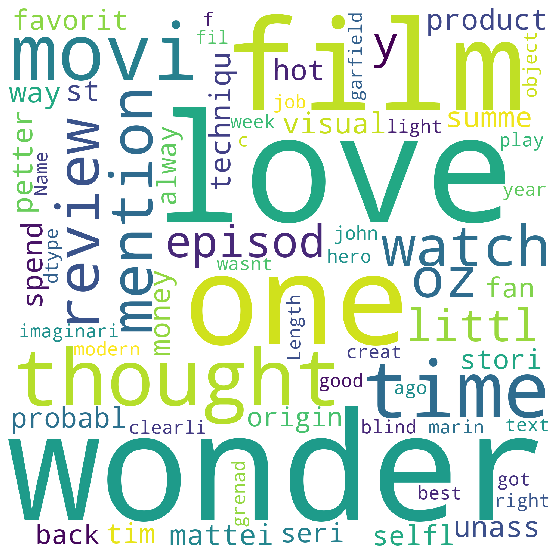

In [ ]:
# FOR POSITIVE WORDS:
make_cloud(train_pos)

### NEGATIVE WORDCLOUD

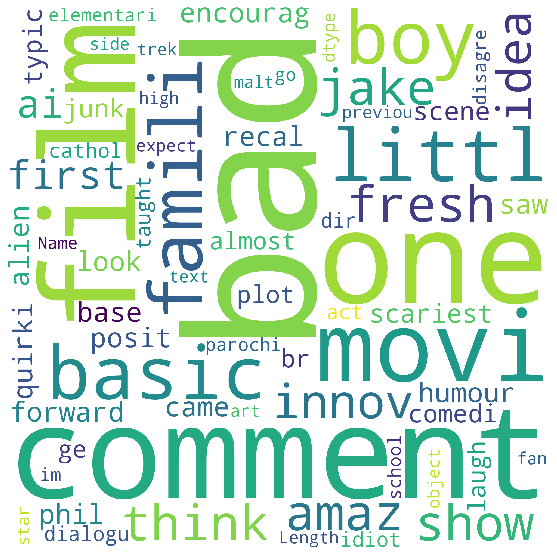

In [ ]:
# for negative words:
make_cloud(train_neg)

### COMBINING LIST INTO A SINGLE STRING

In [ ]:
def convert(lst):       
    return ' , '.join(lst)
df['text'] = df['text'].apply(lambda s:convert(s))
df.head(2)

,text,sentiment
0,"one , reviewers , mentioned , watching , 1 , o...",positive
1,"wonderful , little , production , filming , te...",positive


### COUNT VECTORIZATION(Create a vector that has as many dimensions as your corpora has unique words. Each unique word has a unique dimension and will be represented by a 1 in that dimension with 0s everywhere else.)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from copy import deepcopy
new_df = df
cv.fit([new_df['text'][0], new_df['text'][1]])
x= cv.transform([new_df['text'][0]]).toarray()
y= cv.transform([new_df['text'][1]]).toarray()
columns = cv.get_feature_names()
df1 = pd.DataFrame(x, columns= columns, index= ["Text1"])
df2 = pd.DataFrame(y, columns= columns, index= ["Text2"])
df3 = pd.concat([df1,df2])

# print(new_df['text'][0], new_df['text'][1])

In [ ]:
df3

,accustomed,actors,agenda,agreements,appeal,around,audiences,away,bbc,become,...,well,wholl,williams,wonderful,word,worth,would,wouldnt,written,youll
Text1,1,0,1,1,1,1,1,2,0,1,...,1,2,0,0,2,0,1,1,0,1
Text2,0,1,0,0,0,0,0,0,1,0,...,3,0,1,1,0,1,0,0,1,0


In [ ]:
cv2 = cv.fit(df['text'])
combined_vector = cv2.transform(df['text'])

### Tfidf TRANSFORMATION(instead of just featuring a count, they feature numerical representations where words aren’t just there or not there. Instead, words are represented by their term frequency multiplied by their inverse document frequency.)

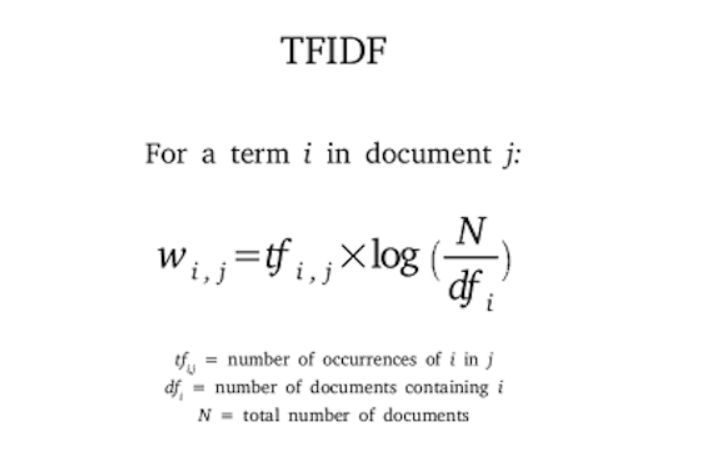

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
tfidf = tf_idf(norm = None)
tfidf.fit([new_df['text'][0],new_df['text'][1]])
x= tfidf.transform([new_df['text'][0]]).toarray()
y= tfidf.transform([new_df['text'][1]]).toarray()
columns = tfidf.get_feature_names()
df1 = pd.DataFrame(x, columns= columns, index= ["Text1"])
df2 = pd.DataFrame(y, columns= columns, index= ["Text2"])
df3 = pd.concat([df1,df2])
df3

,accustomed,actors,agenda,agreements,appeal,around,audiences,away,bbc,become,...,well,wholl,williams,wonderful,word,worth,would,wouldnt,written,youll
Text1,1.405465,0.000000,1.405465,1.405465,1.405465,1.405465,1.405465,2.81093,0.000000,1.405465,...,1.0,2.81093,0.000000,0.000000,2.81093,0.000000,1.405465,1.405465,0.000000,1.405465
Text2,0.000000,1.405465,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.405465,0.000000,...,3.0,0.00000,1.405465,1.405465,0.00000,1.405465,0.000000,0.000000,1.405465,0.000000


In [ ]:
tfidf_transformer = TfidfTransformer().fit(combined_vector)
data_tfidf = tfidf_transformer.transform(combined_vector)
print(data_tfidf.shape)

(50000, 137379)


### SPLITTING DATA INTO TESTING AND TRAINING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(data_tfidf,y,test_size =0.25,random_state=7)

### BEST MODEL (ON BASIS OF BEST F1 SCORE)

In [ ]:
BestModel=' '
Bestf1=0

### 1. SGD CLASSIFIER(Stochastic - Random, Gradient - slope, Descent - downwards)
implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

A support vector machine takes data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary: anything that falls to one side of it we will classify as POSITIVE, and anything that falls to the other as NEGATIVE.



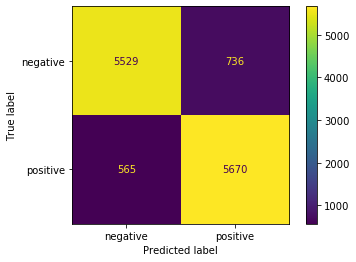

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      6265
    Positive       0.89      0.91      0.90      6235

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

F1 score: 
 0.8959039373297796


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

svm = SGDClassifier().fit(xtrain,ytrain)
ypred = svm.predict(xtest)
report=classification_report(ytest,ypred,target_names=['Negative','Positive'])

# Plotting confusion matrix                 
plot_confusion_matrix(svm,xtest, ytest)   
plt.show() 

#Printing classification report for this model
print("Classification Report: \n",report)                  

# F1-Score of this model
f1score=f1_score(ytest, ypred,average='weighted')
print ("F1 score: \n", f1score)           



if f1score>Bestf1:
    Bestf1=f1score
    BestModel=svm

### 2. BERNOULLI NAIVE BAYES

Naive Bayes:

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). 

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.84      0.89      0.86      6265
    Positive       0.88      0.82      0.85      6235

    accuracy                           0.86     12500
   macro avg       0.86      0.85      0.85     12500
weighted avg       0.86      0.86      0.85     12500

F1 score: 
 0.8548996750115628


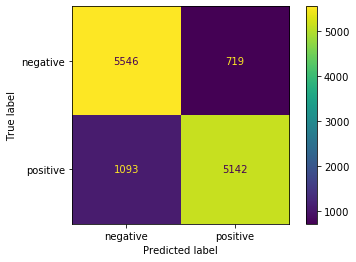

In [ ]:
from sklearn.naive_bayes import BernoulliNB
GNB_classifier = BernoulliNB()
GNB_classifier.fit(xtrain,ytrain)
ypred=GNB_classifier.predict(xtest)

report=classification_report(ytest,ypred,target_names=['Negative','Positive'])
print("Classification Report: \n",report)                  #Printing classification report for this model
f1score=f1_score(ytest, ypred,average='weighted')
print ("F1 score: \n", f1score)                           # F1-Score of this model
plot_confusion_matrix(GNB_classifier,xtest, ytest)   #Plotting confusion matrix 
plt.show()  

if f1score>Bestf1:
    Bestf1=f1score
    BestModel=GNB_classifier

### SPLITTING DATA INTO TEST, TRAIN AND VALIDATE

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data_tfidf, y, test_size=0.2, random_state=1)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

this algorithm creates a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

### 3. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
maxf1=0
max_depth=0

for maximum_tree_depth in range(5,60,4):
    model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
    model_dt.fit(xtrain,ytrain)
    ypred = model_dt.predict(xval)
#     print(confusion_matrix(ypred, yval))
#     print(accuracy_score(ypred,yval))
    f1score=f1_score(ypred,yval, average='weighted')
    print("f1score: ",f1score, " depth: ", maximum_tree_depth)
    if f1score>maxf1:
        maxf1 = f1score
        max_depth = maximum_tree_depth
        
print("Best f1 is at depth: ", max_depth)

In [ ]:
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [ ]:
!pip install dtreeviz

In [ ]:
data = df
for r in range(len(data['sentiment'])):
    if data.loc[r]['sentiment']=='positive':
        data.loc[r]['sentiment']=1
    else:
        data.loc[r]['sentiment']=0

In [ ]:
data['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

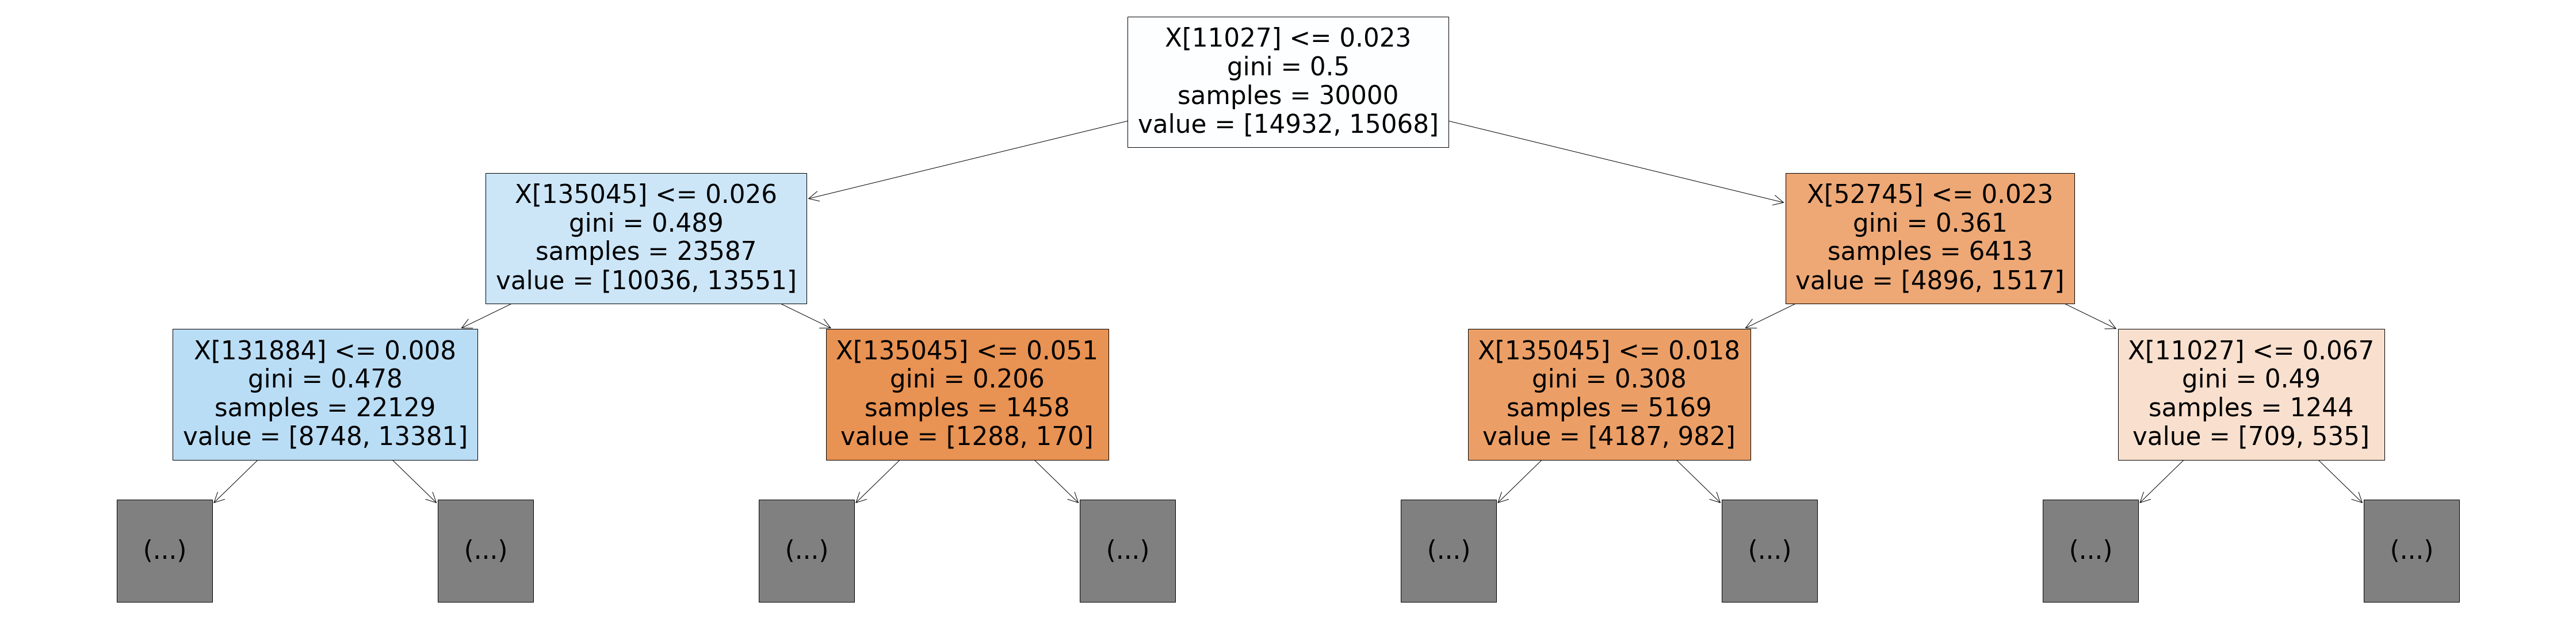

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
f = plt.figure()
f.set_figwidth(80)
f.set_figheight(20)
plot_tree(dt, filled=True, max_depth=2)
plt.show()

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.78      0.67      0.72      5044
    Positive       0.71      0.81      0.75      4956

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

F1 score: 
 0.7370864798865708


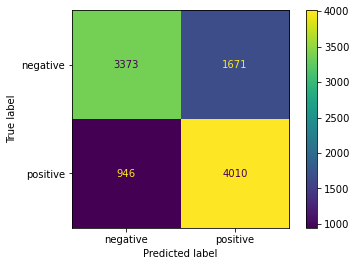

In [ ]:
report=classification_report(ytest,ypred,target_names=['Negative','Positive'])
print("Classification Report: \n",report)                 
f1score=f1_score(ytest, ypred,average='weighted')
print ("F1 score: \n", f1score)                           # F1-Score of this model
plot_confusion_matrix(dt,xtest, ytest)   #Plotting confusion matrix 
plt.show()  

if f1score>Bestf1:
    Bestf1=f1score
    BestModel=dt

In [ ]:
print(" Best Model is: ", BestModel)
print(" Best f1score is: ", Bestf1)

 Best Model is:  SGDClassifier()
 Best f1score is:  0.8915628039480007


**WE GOT MAXIMUM ACCURACY WITH SUPPORT VECTOR MACHINE MODEL WITH F SCORE AS 0.89**